# **NAME: K J VISHAAL**
# **THE SPARKS FOUNDATION - GRIP JULY-21** 
# **DATA SCIENCE  AND BUSINESS ANALYTICS INTERNSHIP**
TASK #1 - Prediction using Supervised ML - using SIMPLE LINEAR REGRESSION ALGORTIHM

TASK: Predict the percentage of an student based on the no. of study hours. 

DATASET - http://bit.ly/w-data






**Step 1: Importing required libraries.**

In [38]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

**Step 2: Reading data from given link using Pandas**

In [39]:

url = "http://bit.ly/w-data"
dt= pd.read_csv(url)
print("Data imported successfully")

dt.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Step 3: Data Preprocessing**

Checking for the null values if there exist any 

In [40]:
dt.isnull().any()

Hours     False
Scores    False
dtype: bool

The basic information of the dataset:

In [41]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [42]:
dt.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Checking all columns in the Dataset:

In [43]:
dt.columns

Index(['Hours', 'Scores'], dtype='object')

**Step 4 : Splitting the Dataset and Scatter plot**

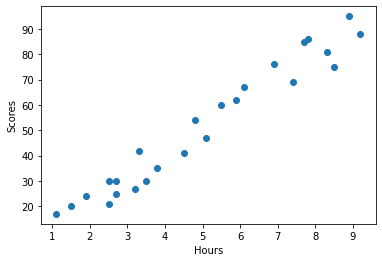

In [44]:
x=dt.iloc[:,:1]
y=dt['Scores']
plt.scatter(x,y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

**Step 5 : Splitting the Dataset into Training and Testing data**

In [45]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [46]:
#No of Entries in each
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (18, 1)
x_test : (7, 1)
y_train : (18,)
y_test : (7,)


**Step 6: Training**

In [47]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


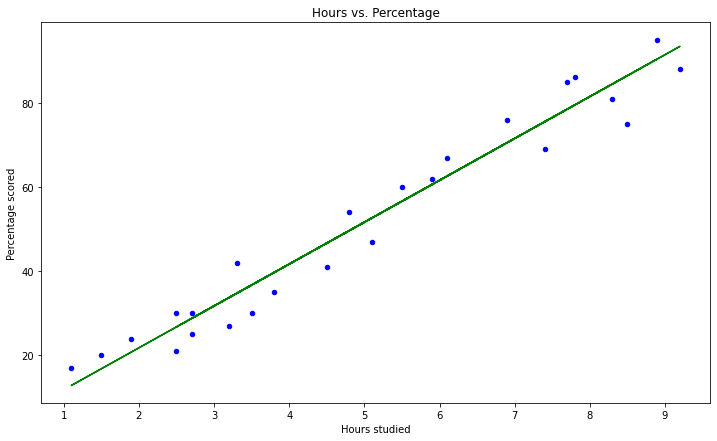

In [48]:
# Plotting the regression line
dt.plot(kind="scatter", x="Hours", y="Scores", figsize=(12,7), color='blue')
line = regressor.coef_[0]*x_train + regressor.intercept_
plt.plot(x_train, line,color='green')
plt.title('Hours vs. Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.show()

**Step 6: Making Predictions**

In [49]:
y_pred = regressor.predict(x_test) # Predicting the scores
print(x_test) # Testing data - In Hours

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
22    3.8
17    1.9


In [50]:
# Comparing the actual and predicted scores
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df1

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


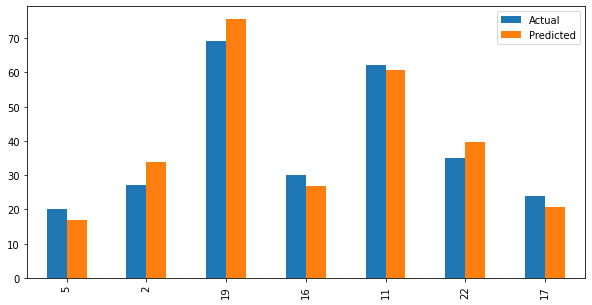

In [51]:
# Plot graphs comparing actual and predicted data (using bar and line graphs)
df1.plot(kind = "bar",figsize =(10,5))
plt.show()

**Question: Predicting Results for 9.25 study Hours of Student**

In [53]:
t = regressor.predict([[9.25]])
print("The predicted score for the given study hours is:",t)

The predicted score for the given study hours is: [93.89272889]


**Step 7: Evaluating the Model:**

In [54]:
from sklearn import metrics  
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error(MAE): 4.130879918502482
Root Mean Squared Error(RMSE): 4.509204328368805
